## <font color="plum">Melina H</font>

This task is about predict if a loan will get approved or not.

The data source is from **Dream Housing Finance**. Where our variables is:

Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 



In [3]:
import pandas as pd 
import numpy as np    
import seaborn as sns       
import matplotlib.pyplot as plt
%matplotlib inline  

- <font color="plum">Pandas</font> for structured data operations and manipulations. It is extensively used for data munging and preparation. Pandas were added relatively recently to Python and have been instrumental in boosting Python’s usage in data scientist community.

- <font color="plum">NumPy</font> stands for Numerical Python. The most powerful feature of NumPy is n-dimensional array. This library also contains basic linear algebra functions, 

- <font color="plum">Seaborn</font> for statistical data visualization. Seaborn is a library for making attractive and informative statistical graphics in Python. It is based on matplotlib. Seaborn aims to make visualization a central part of exploring and understanding data.

- <font color="plum">Matplotlib</font> for plotting vast variety of graphs, starting from histograms to line plots to heat plots.. You can use Pylab feature in ipython notebook (ipython notebook –pylab = inline) to use these plotting features inline. If you ignore the inline option, then pylab converts ipython environment to an environment, very similar to Matlab. You can also use Latex commands to add math to your plot.

(copy paste)

_______

For this practice problem, we have been given three CSV files: train, test and sample submission.
Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data. Sample submission file contains the format in which we have to submit our predictions.

In [7]:
path = '/Users/Melina/Desktop/DSDS/'
sample_set = pd.read_csv(path + "Sample.csv")
#to see it just type sample_set

In [8]:
path = '/Users/Melina/Desktop/DSDS/'
test_set = pd.read_csv(path + "test.csv")
#to see it just type path

In [9]:
path = '/Users/Melina/Desktop/DSDS/'
train_set = pd.read_csv(path + "train.csv")
#to see it just type path

I'll make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [7]:
train_original=train_set.copy() 
test_original=test_set.copy()

And to make it easier to see the columns just;


In [8]:
test_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

And to see what kind of data we have in our data set:

In [9]:
train_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We can see there are three format of data types:

**object:** Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

**int64:** It represents the integer variables. ApplicantIncome is of this format. 64 bytes!?

**float64:** It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

___________

And just to see how many rows and colomns we have

In [11]:
train_set.shape 

(614, 13)

In [12]:
test_set.shape

(367, 12)

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

_______

We will first look at the target variable, i.e., *Loan_Status*. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.
Frequency table of a variable will give us the count of each category in that variable.

In [13]:
train_set['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train_set['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

And to illustrate this:

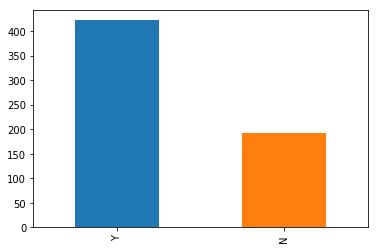

In [15]:
train_set['Loan_Status'].value_counts().plot.bar()



*The loan of 410(ish 66% = $\frac{410}{614})$ people out of 614 was approved.*

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

**Categorical features:** These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

**Ordinal features:** Variables in categorical features having some order involved (Dependents, Education, Property_Area)

**Numerical features:** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
Let’s visualize the categorical and ordinal features first.

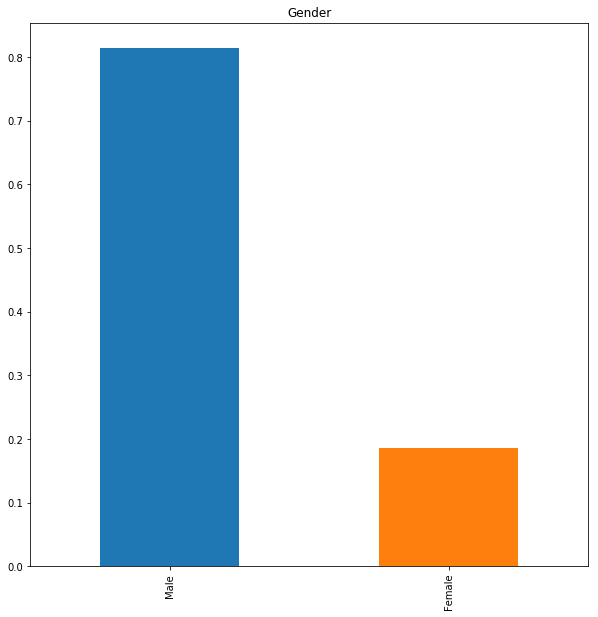

In [15]:
train_set['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Gender') 

See how many men vs women in the data set

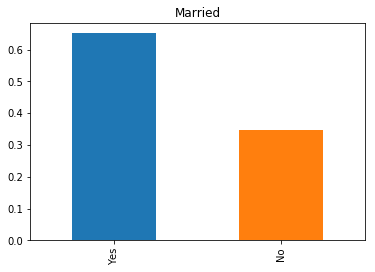

In [17]:
train_set['Married'].value_counts(normalize=True).plot.bar(title='Married')

How many who are married and not married in the data set. Married -> two persons -> easier to get a loan (often).

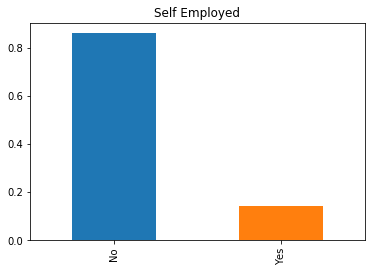

In [18]:
train_set['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed") 

Self employed vs not. 

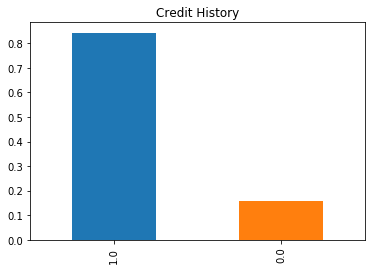

In [19]:
train_set['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History') 

HOw many that are having a credit history (can affect your creditworthiness)

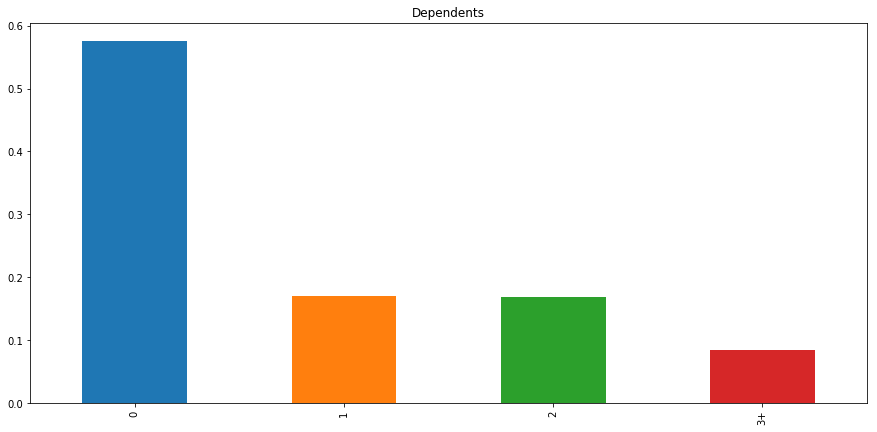

In [24]:
train_set['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,7), title= 'Dependents') 

If you have $n$ dependents, here is $n$ number of them. 

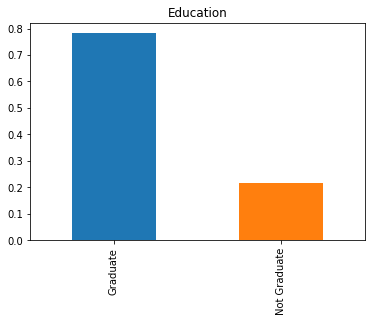

In [21]:
 train_set['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

How many who have education

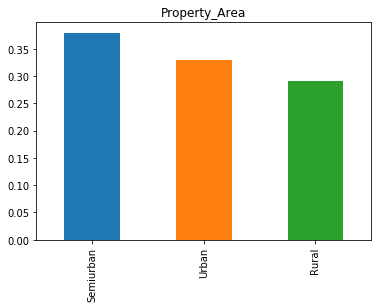

In [22]:
train_set['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

Where they live

## Now, let's see if this is normal distributed. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


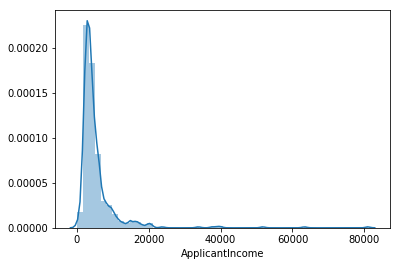

In [23]:
sns.distplot(train_set['ApplicantIncome']); 

### .. and illustrate the outliners

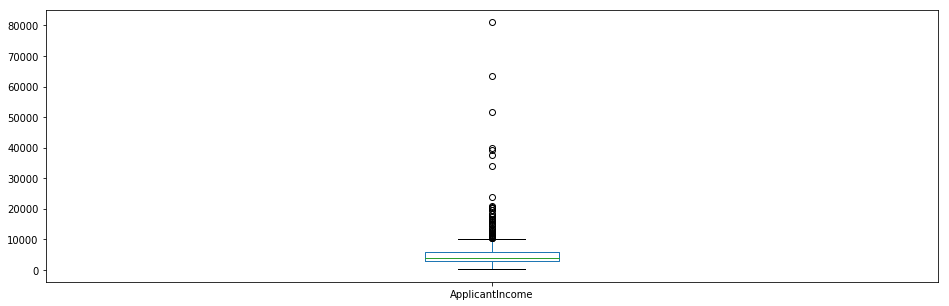

In [24]:
train_set['ApplicantIncome'].plot.box(figsize=(16,5)) 

We see from this two figures, that this data is not normally distributed, so we should make it normal distributed.

And from the second figure, in the box plot, that there is outliers. 

#### This could be beacuse the diffrent in peoples income, or maybe peoples diffrent amount of dependens. 

________

Text(0.5,0.98,'')

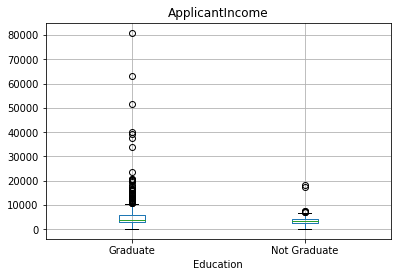

In [27]:
train_set.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


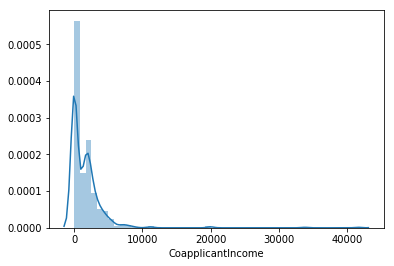

In [28]:
sns.distplot(train_set['CoapplicantIncome']); 

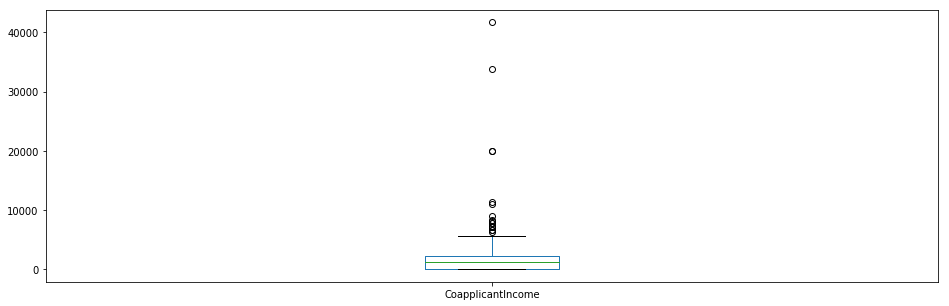

In [29]:
train_set['CoapplicantIncome'].plot.box(figsize=(16,5)) 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


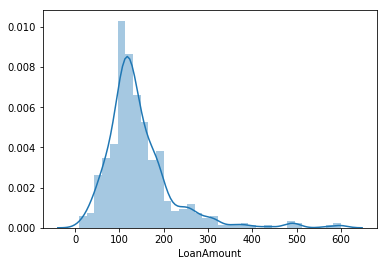

In [13]:
df=train_set.dropna()
sns.distplot(df['LoanAmount']); 

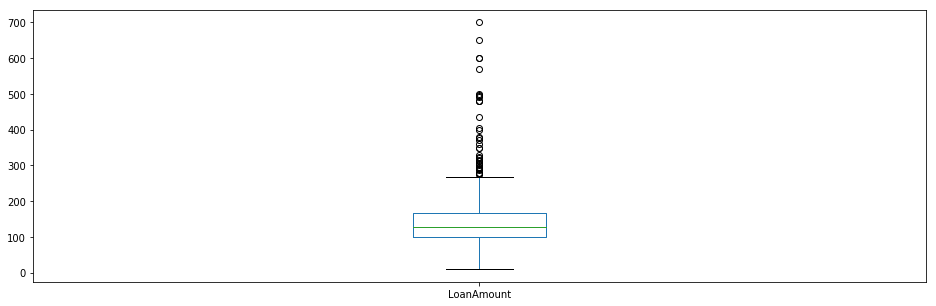

In [31]:
train_set['LoanAmount'].plot.box(figsize=(16,5)) 

We see a lot of outliers in this variable and the distribution is fairly normal.

If we are going back to our hypothesis, here is some factors who can affect it:
- The applicants with higher income have more chances to get a loan.
- Applications who have a good creditworthiness get higher chances. 
- If you have dependens/marrie i.e have someone to back you up.

Let's see the relationship between the taget variable and categorical independent variables. 

To see how the proportion of approved and unapproved loans with respect to our variables.



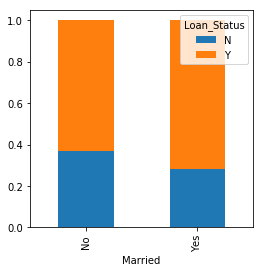

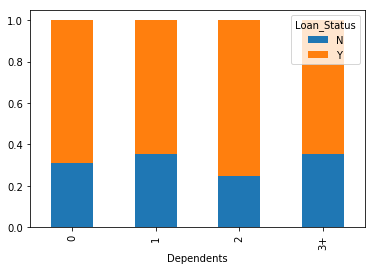

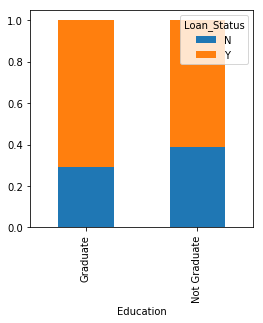

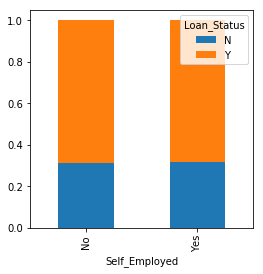

In [14]:
Married=pd.crosstab(train_set['Married'],train_set['Loan_Status'])
Dependents=pd.crosstab(train_set['Dependents'],train_set['Loan_Status']) 
Education=pd.crosstab(train_set['Education'],train_set['Loan_Status']) 
Self_Employed=pd.crosstab(train_set['Self_Employed'],train_set['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Independent Variable vs Target Variable



We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.



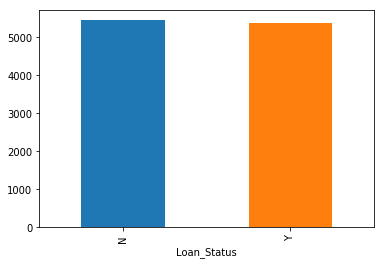

In [36]:
train_set.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the $y$-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

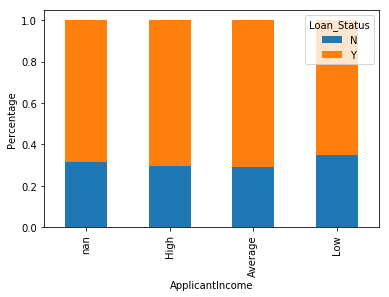

In [37]:
bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high']  

train_set['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train_set['Income_bin'],train_set['Loan_Status']) 

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('ApplicantIncome')

P = plt.ylabel('Percentage')

So it seems that a persons income dosen't affect the chances to get a loan.

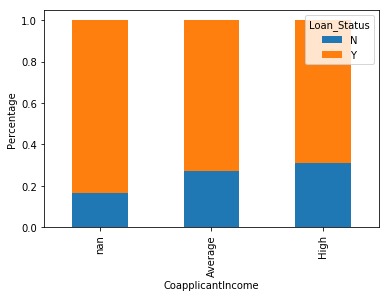

In [38]:
bins=[0,1000,3000,42000] 

group=['Low','Average','High'] 

train_set['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)


Coapplicant_Income_bin=pd.crosstab(train_set['Coapplicant_Income_bin'],train_set['Loan_Status']) 

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('CoapplicantIncome')

P = plt.ylabel('Percentage')

This shows that having a coapplicant make less chances of the loan approval. But have in mind that not many people might have a loan approval!

So let's look at another varibles. 

* Is there a chance that the total income can have an effect on the approval?

$\mu_0 = $ no,

$\mu_1 = $ yes.

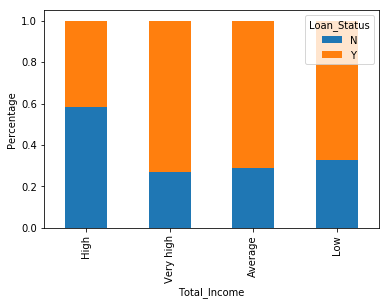

In [26]:
train_set['Total_Income']=train_set['ApplicantIncome']+train_set['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high'] 

train_set['Total_Income_bin']=pd.cut(train_set['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_set['Total_Income_bin'],train_set['Loan_Status']) 

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Total_Income') 

P = plt.ylabel('Percentage')

We can see that proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. So it's a quite diffrent, so we reject the null hypothesis. Actually, one should be able to use another test, type of confinement interval to see how close it is to the interval: [no, yes]

--------------


Let's look at another hypotheis here:

Does it depending how big the loan is?

$\mu$ = no

$\mu =$  yes

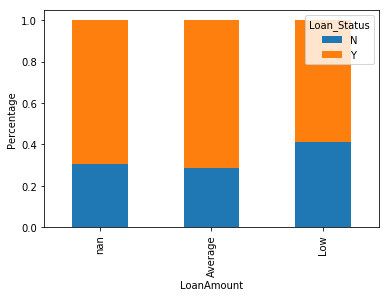

In [40]:
bins=[0,100,200,700] 

group=['Low','Average','High'] 

train_set['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_set['LoanAmount_bin'],train_set['Loan_Status']) 

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('LoanAmount') 

P = plt.ylabel('Percentage')

Here, the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis.

Let’s drop the bins which we created for the exploration part. 

We will change the +3 in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.


In [42]:
train_set=train_set.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train_set['Dependents'].replace('3+', 3,inplace=True) 

test_set['Dependents'].replace('3+', 3,inplace=True) 

train_set['Loan_Status'].replace('N', 0,inplace=True)

train_set['Loan_Status'].replace('Y', 1,inplace=True)

KeyError: "labels ['Income_bin' 'Coapplicant_Income_bin' 'LoanAmount_bin' 'Total_Income_bin'\n 'Total_Income'] not contained in axis"

?!!!!!!!!!!!

**The correlation matrix**

The variables with darker color means their correlation is more.

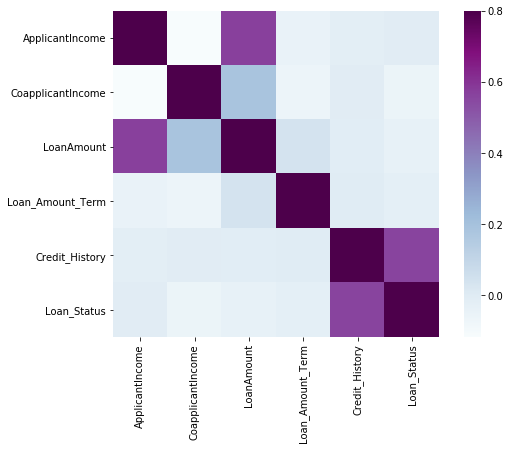

In [45]:
matrix = train_set.corr()

ax = plt.subplots(figsize=(9, 6)) 

sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

LoanAmount is also correlated with CoapplicantIncome.

_______

Now, let's do something about the outliners. 

So we should find the mean, median, mode and the standard deviation. And then look at the diffrent (before - aftere) to see the outliers effect on the distribution. And look for skewness (left or right, which we can see on the tail)
As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [47]:
train_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So I have here, six missing values; Loan_ID, Education, ApplicantIncome, Co applicantIncome, Property_Area and Loan_Status

We will treat the missing values in all the features one by one.
We can consider these methods to fill the missing values:
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

In [48]:
train_set['Loan_ID'].fillna(train_set['Loan_ID'].mode()[0], inplace=True) 
train_set['Education'].fillna(train_set['Education'].mode()[0], inplace=True)
train_set['ApplicantIncome'].fillna(train_set['ApplicantIncome'].mode()[0], inplace=True) 
train_set['CoapplicantIncome'].fillna(train_set['CoapplicantIncome'].mode()[0], inplace=True)
train_set['Property_Area'].fillna(train_set['Property_Area'].mode()[0], inplace=True)
train_set['Loan_Status'].fillna(train_set['Loan_Status'].mode()[0], inplace=True)

A way to fill the missing values is with this code:

In [49]:
train_set['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

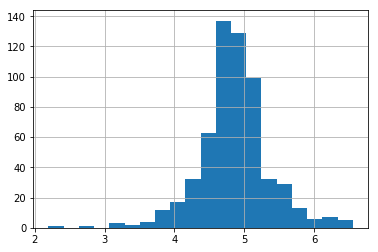

In [50]:
train_set['LoanAmount_log'] = np.log(train_set['LoanAmount']) 

train_set['LoanAmount_log'].hist(bins=20)

test_set['LoanAmount_log'] = np.log(test_set['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

### Logistic Regression - which is used for predicting binary outcome.

In [52]:
#If we need to drop some variables; use
train_set=train_set.drop('Loan_ID',axis=1) 
test_set=test_set.drop('Loan_ID',axis=1)
#I choose to drop Loan ID beacuse it has nothing to do with the loan 

KeyError: "labels ['Loan_ID'] not contained in axis"

In [53]:
X = train_set.drop('Loan_Status',1) 
y = train_set.Loan_Status

Now we will make dummy variables for the categorical variables. (i.e Gender, since we can only be male and female)

In [55]:
X=pd.get_dummies(X) 
train_set=pd.get_dummies(train_set) 
test_set=pd.get_dummies(test_set)

To make predictions for the test data set; one way to do this is we can split our data set into two parts: train and validiation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset). 

In [56]:
from sklearn.model_selection  import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.5)

Import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [57]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

noooo

# <font color="plum">Conclusions.</font>

We put forward two hypotheses as to how large the loan amount was, and whether the income played a role. And that was well in line with our hypothesis.

What I had wanted to add to this data set, or just in the calculation is, what is the person to borrow it for? random loans (eg irrational people who borrow to go on holiday) vs. mortgages. When mortgages are seen as an investment.